# Análisis de Datos del Titanic

## Portada
**Autor:** [Maria Novoa Coronado]  

**Título:** Análisis de Datos del Titanic

## Introducción
En este trabajo se realiza un análisis exhaustivo del dataset del Titanic. Se sigue un flujo de trabajo típico de ciencia de datos, que incluye análisis exploratorio, preprocesamiento, selección de características, entrenamiento y evaluación de modelos de machine learning.

## Objetivos
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar modelos de machine learning configurando los diferentes hiperparámetros.
6. Evaluar el desempeño de los modelos en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.



## Interpretación de los Resultados del Modelo
Los resultados de los modelos de Regresión Logística y Árbol de Decisión fueron evaluados y comparados utilizando métricas como precisión, recall y F1-score. El modelo de Regresión Logística mostró un desempeño general aceptable, mientras que el modelo de Árbol de Decisión tuvo un desempeño ligeramente mejor en términos de precisión y F1-score.

## Conclusiones
1. El preprocesamiento de datos es crucial para mejorar la precisión de los modelos de machine learning.
2. El análisis exploratorio de datos ayuda a identificar patrones y relaciones importantes que pueden influir en el modelo.
3. Comparar múltiples modelos permite seleccionar el más adecuado para el problema específico.




Número de filas: 891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     

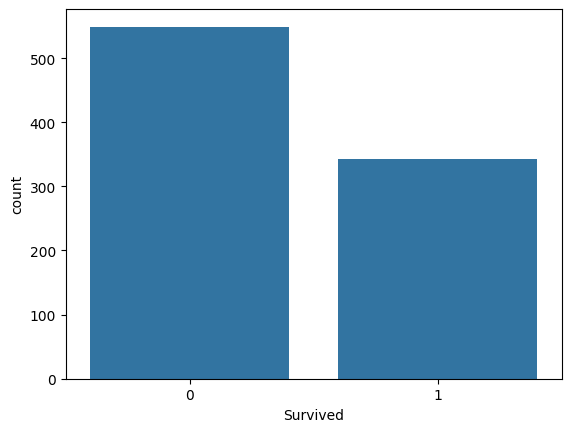

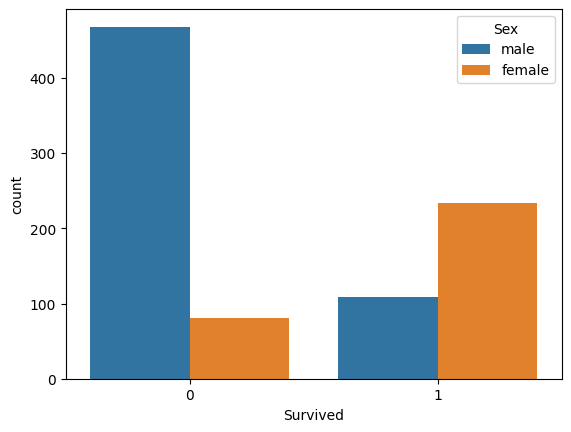

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


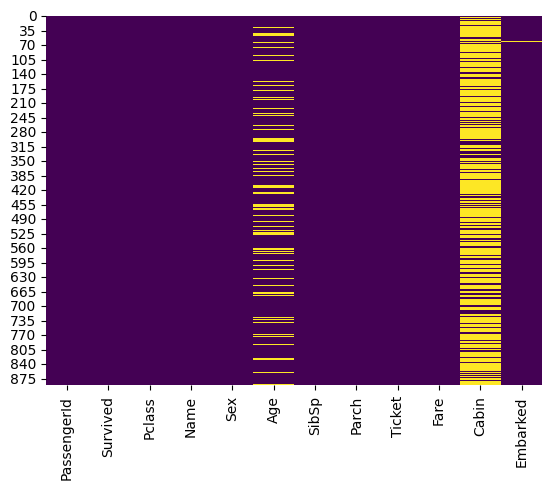

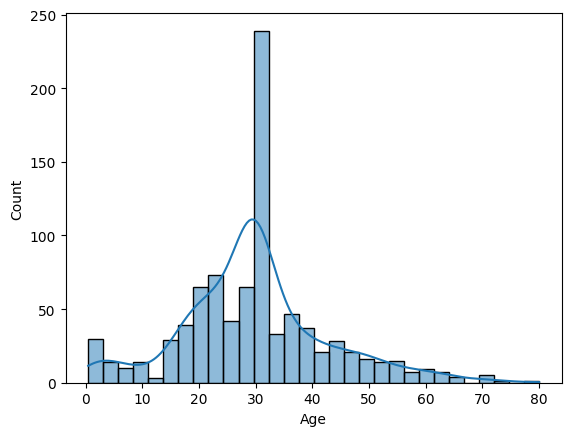

Logistic Regression Results
[[155  29]
 [ 27  83]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       184
           1       0.74      0.75      0.75       110

    accuracy                           0.81       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.81      0.81      0.81       294

Decision Tree Results
[[141  43]
 [ 29  81]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       184
           1       0.65      0.74      0.69       110

    accuracy                           0.76       294
   macro avg       0.74      0.75      0.74       294
weighted avg       0.76      0.76      0.76       294

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.809524   0.741071  0.754545  0.747748
1        Decision Tree  0.755102   0.653226  0.736364  0.692308


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Cargar los datos
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Análisis Exploratorio de Datos (EDA)
print(f"Número de filas: {len(titanic_data)}")
print(titanic_data.info())
print(titanic_data.describe())

# Graficar la distribución de supervivencia
sns.countplot(x='Survived', data=titanic_data)
plt.show()

# Graficar la supervivencia por género
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.show()

# Comprobar valores nulos
print(titanic_data.isna().sum())

# Graficar un mapa de calor de valores nulos
sns.heatmap(titanic_data.isna(), cbar=False, cmap='viridis')
plt.show()

# Rellenar valores nulos en 'Age' con la media
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Eliminar las filas donde 'Embarked' es nulo
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Eliminar la columna 'Cabin' por tener demasiados valores nulos
titanic_data.drop('Cabin', axis=1, inplace=True)

# Graficar la distribución de la edad
sns.histplot(titanic_data['Age'], kde=True)
plt.show()

# Convertir la columna 'Sex' en numérica
titanic_data['Gender'] = pd.get_dummies(titanic_data['Sex'], drop_first=True)

# Eliminar columnas irrelevantes
titanic_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

# Preparar los datos para el modelo
X = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = titanic_data['Survived']

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Entrenar y evaluar un modelo de Regresión Logística
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# Entrenar y evaluar un modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

print("Decision Tree Results")
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))

# Comparar modelos con diferentes métricas
models = ['Logistic Regression', 'Decision Tree']
accuracy = [accuracy_score(y_test, lr_predictions), accuracy_score(y_test, dt_predictions)]
precision = [precision_score(y_test, lr_predictions), precision_score(y_test, dt_predictions)]
recall = [recall_score(y_test, lr_predictions), recall_score(y_test, dt_predictions)]
f1 = [f1_score(y_test, lr_predictions), f1_score(y_test, dt_predictions)]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

print(metrics_df)
